## 5 Results and investment strategies on real data
### 5.2 Signals study

In [2]:
import os
path = os.getcwd() + '/results/'

os.chdir('../')
from inference_nma_hmm.operations import *

import matplotlib.transforms as mtransforms

In [35]:
palette = sns.color_palette("husl", 3) 

##### Results recuperation

In [36]:
y, dates = np.load(path + 'y_msciworld_L0_monthly.npy'), np.load(path + 'dates_msciworld_L0_monthly.npy')
dates = [pd.to_datetime(d) for d in dates]

xb_L0, xc_L0 = np.load(path + 'xb_msciworld_L0_monthly.npy'), np.load(path + 'xc_msciworld_L0_monthly.npy')
xb_L2, xc_L2 = np.load(path + 'xb_msciworld_L2_monthly.npy'), np.load(path + 'xc_msciworld_L2_monthly.npy')
xb_L5, xc_L5 = np.load(path + 'xb_msciworld_L5_monthly.npy'), np.load(path + 'xc_msciworld_L5_monthly.npy')
xb_L8, xc_L8 = np.load(path + 'xb_msciworld_L8_monthly.npy'), np.load(path + 'xc_msciworld_L8_monthly.npy')
xb_L10, xc_L10 = np.load(path + 'xb_msciworld_L10_monthly.npy'), np.load(path + 'xc_msciworld_L10_monthly.npy')
xb_Lvar, xc_Lvar = np.load(path + 'xb_msciworld_Lvar_monthly.npy'), np.load(path + 'xc_msciworld_Lvar_monthly.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/eleonore/Documents/GitHub/Data driven investment strategies using Bayesian inference in regime switching models/5_ Results and investment strategies on real data/results/y_msciworld_L0_monthly.npy'

In [37]:
xb_all, xc_all = [np.ones(len(xb_L0)), xb_L0, xb_L2, xb_L5, xb_L8, xb_L10, xb_Lvar], [np.ones(len(xc_L0)), xc_L0, xc_L2, xc_L5, xc_L8, xc_L10, xc_Lvar]
signal_all = ['Benchmark', 'HMM', 'MA(2)-HMM', 'MA(5)-HMM', 'MA(8)-HMM', 'MA(10)-HMM', 'MA(L)-HMM with model selection']

##### Signals study

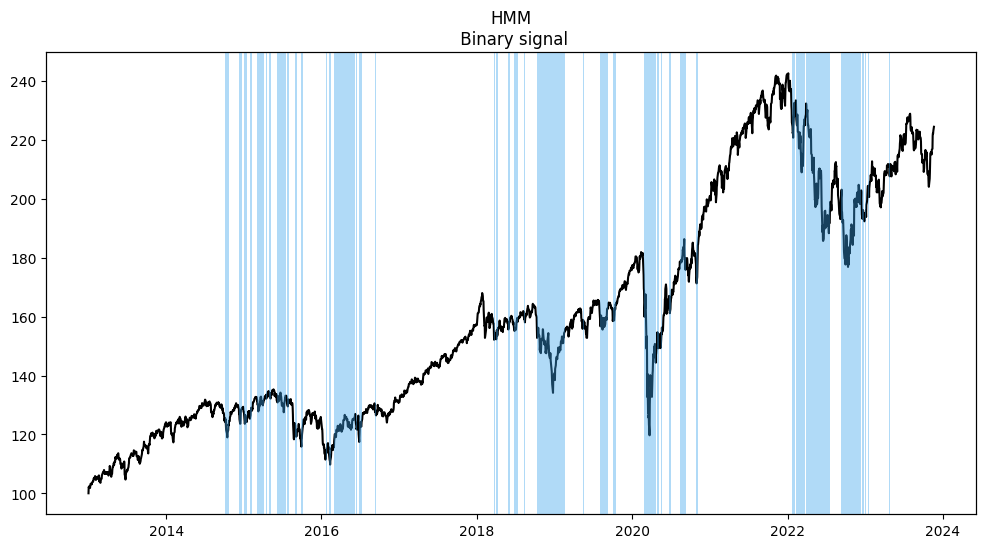

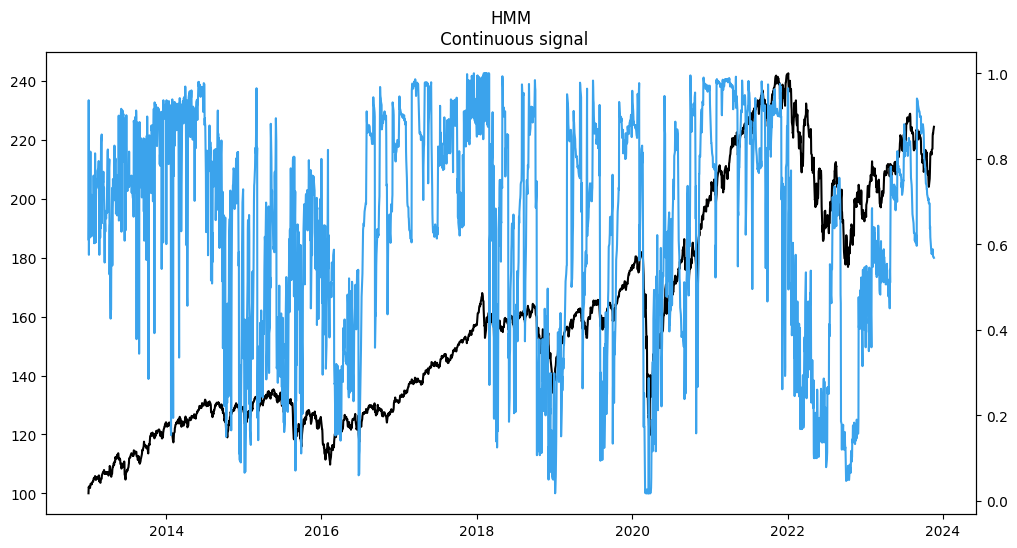

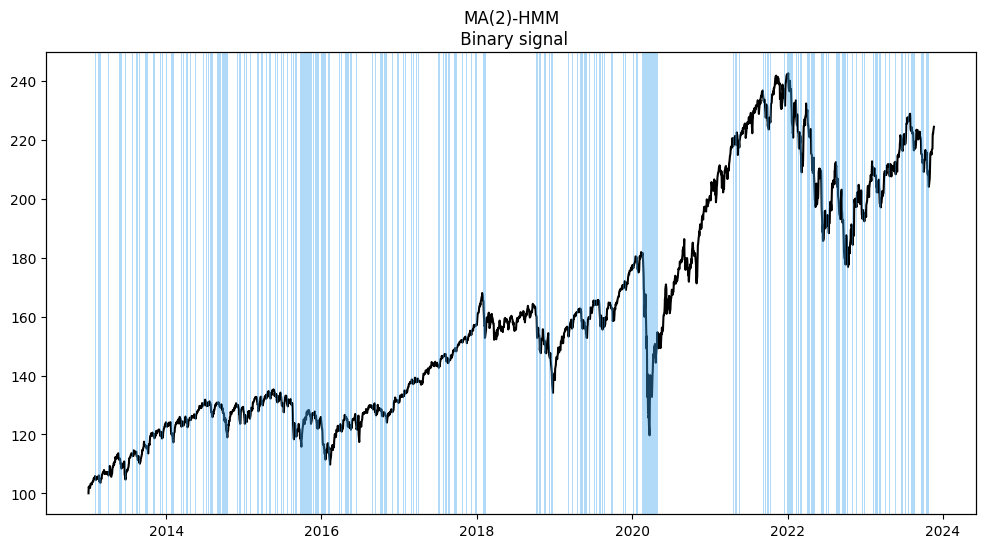

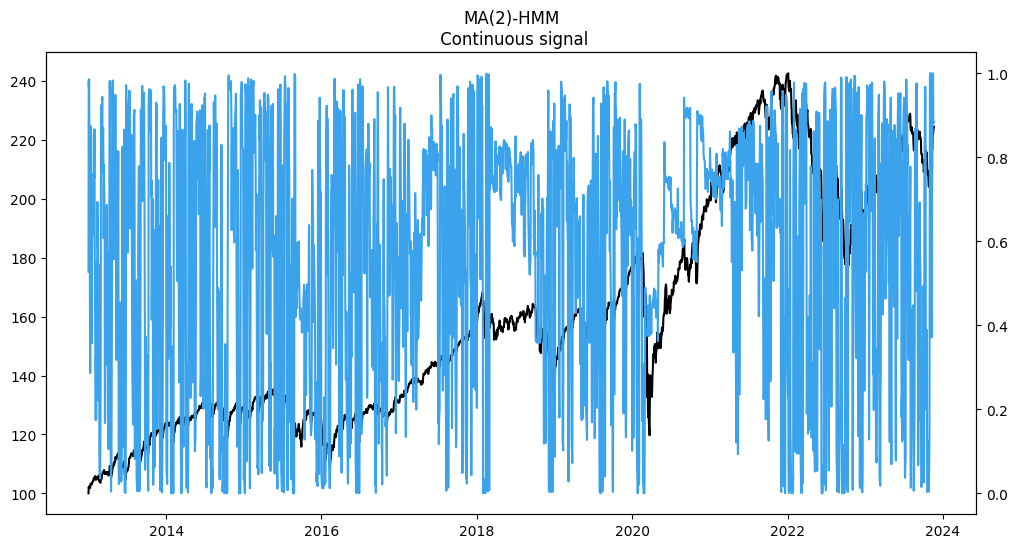

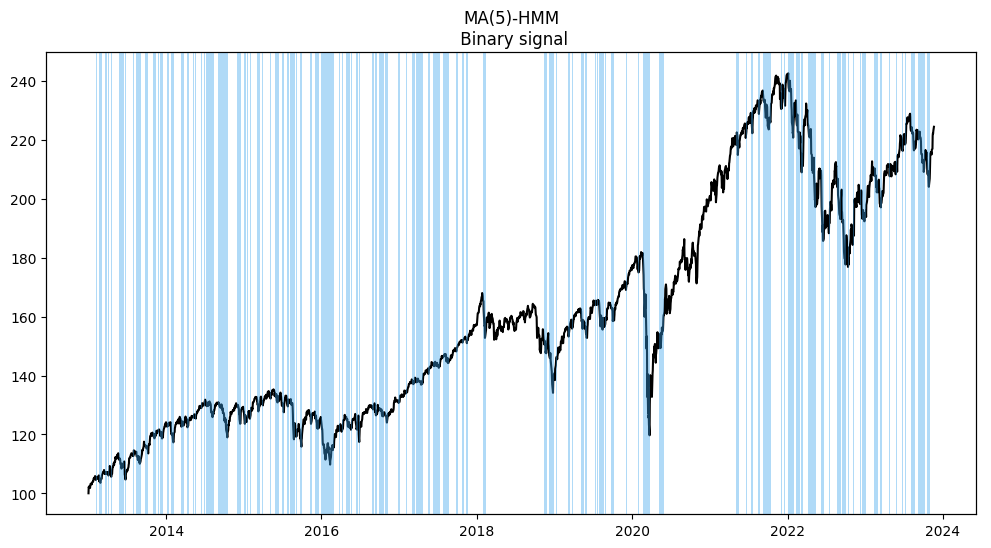

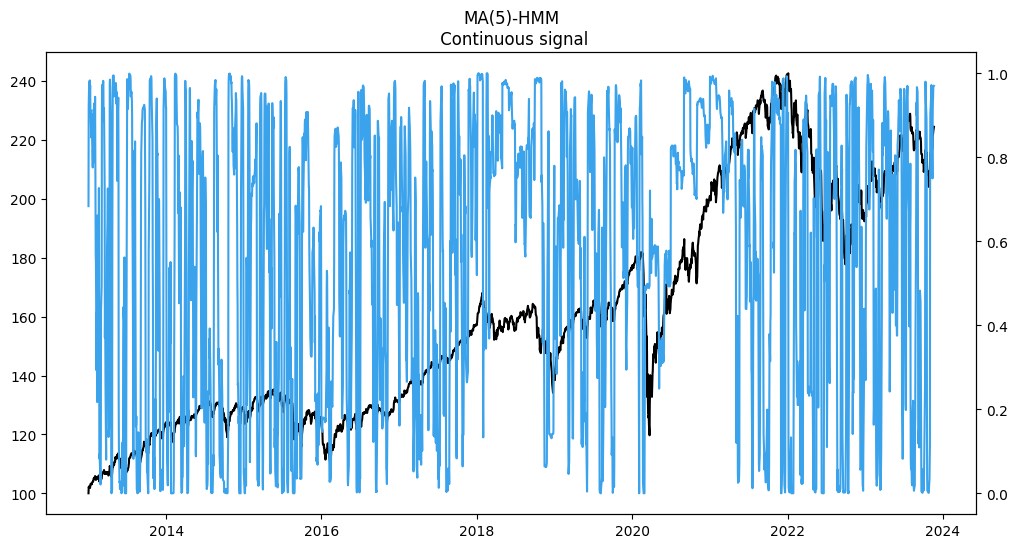

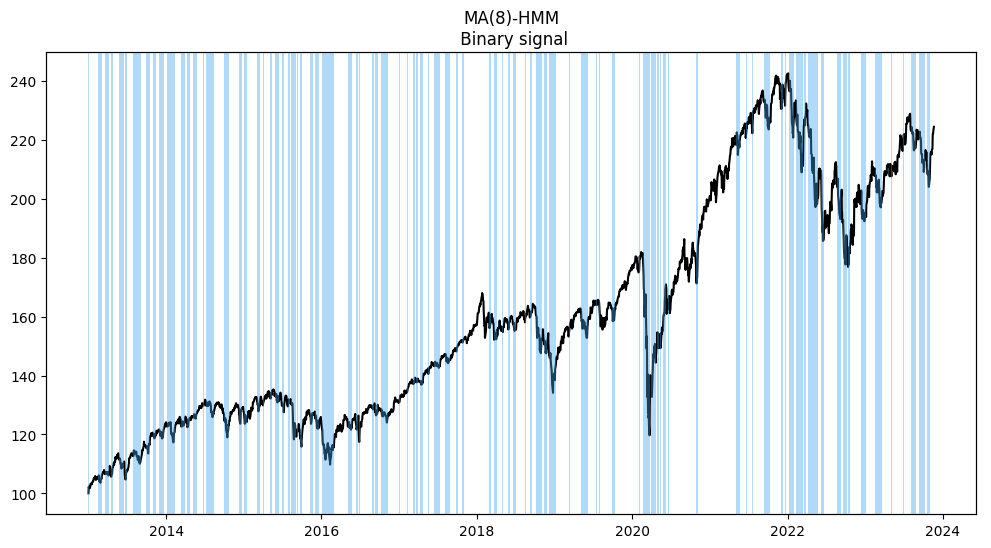

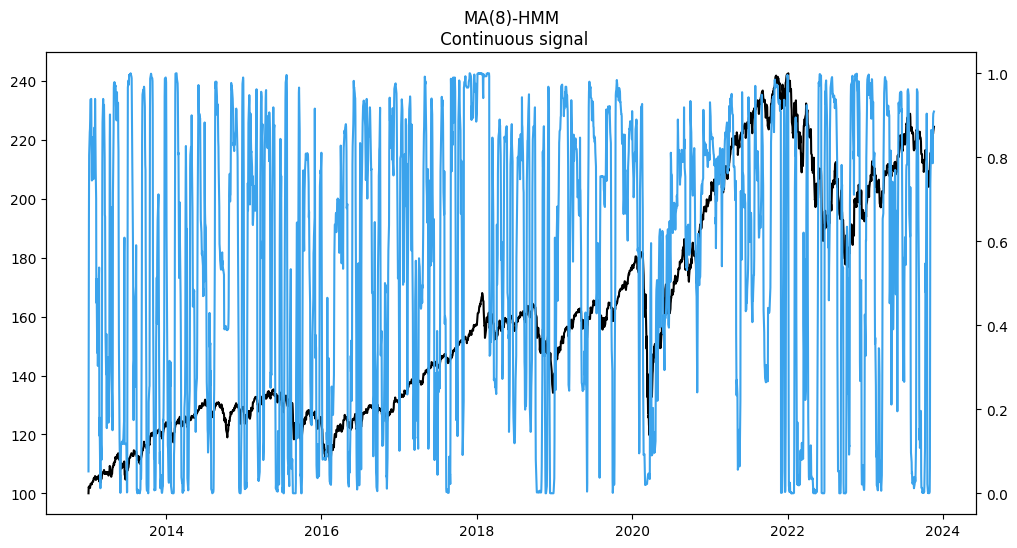

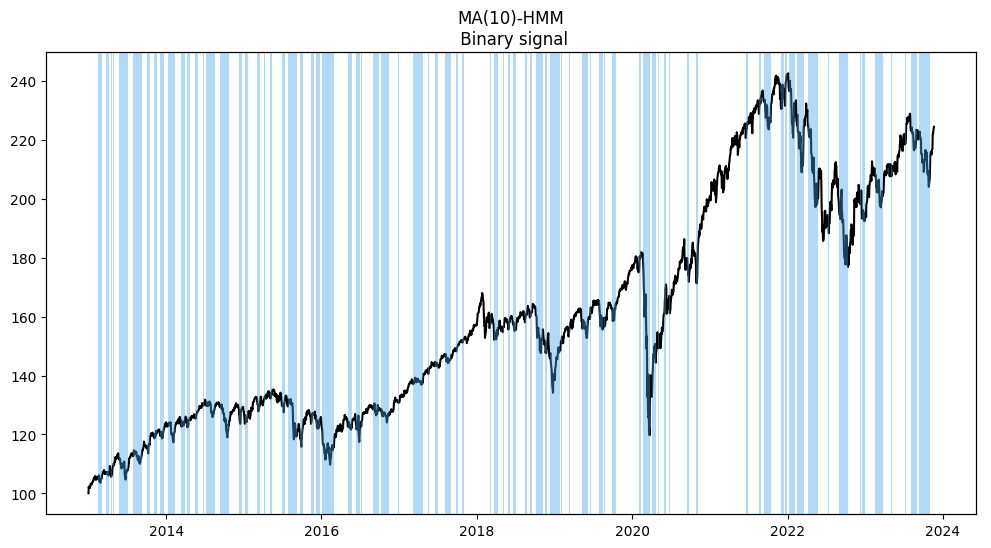

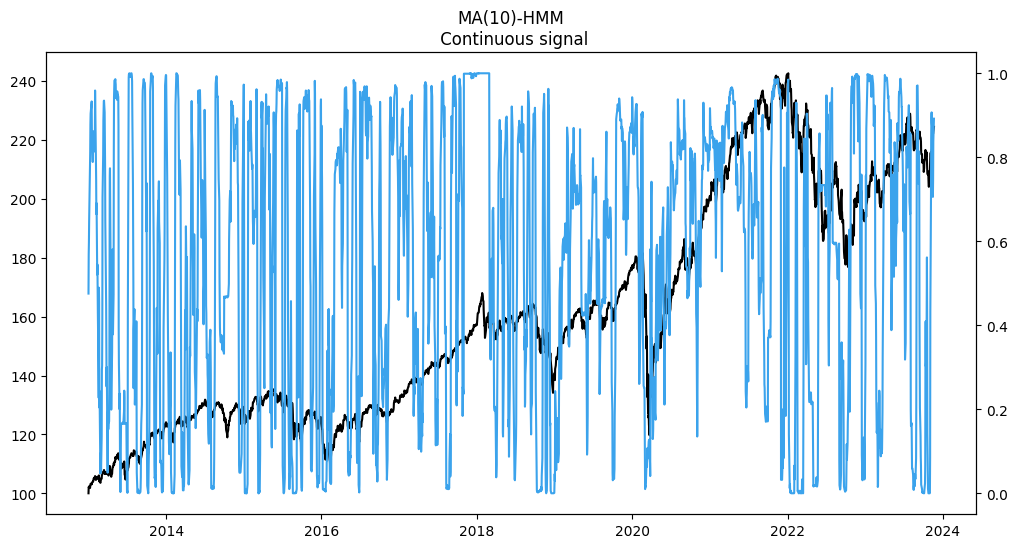

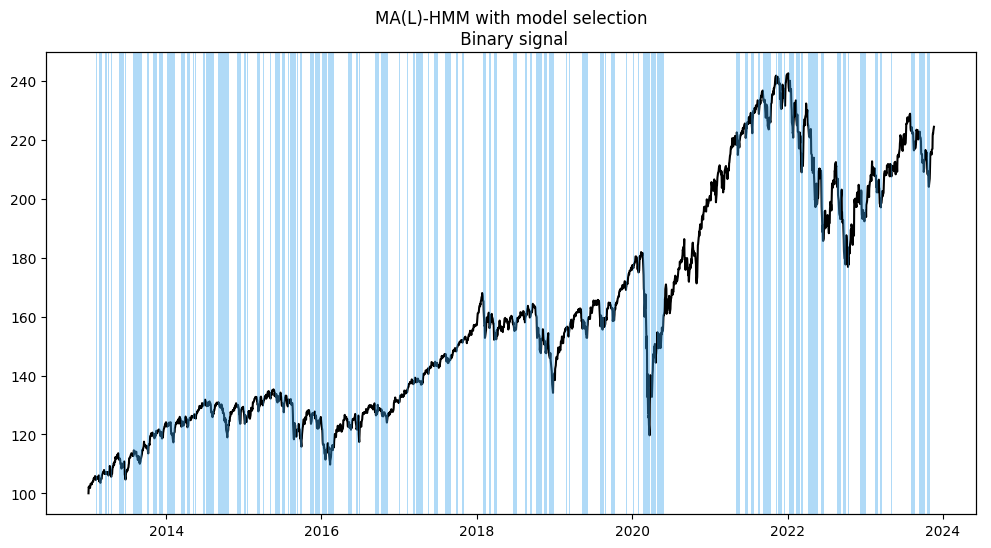

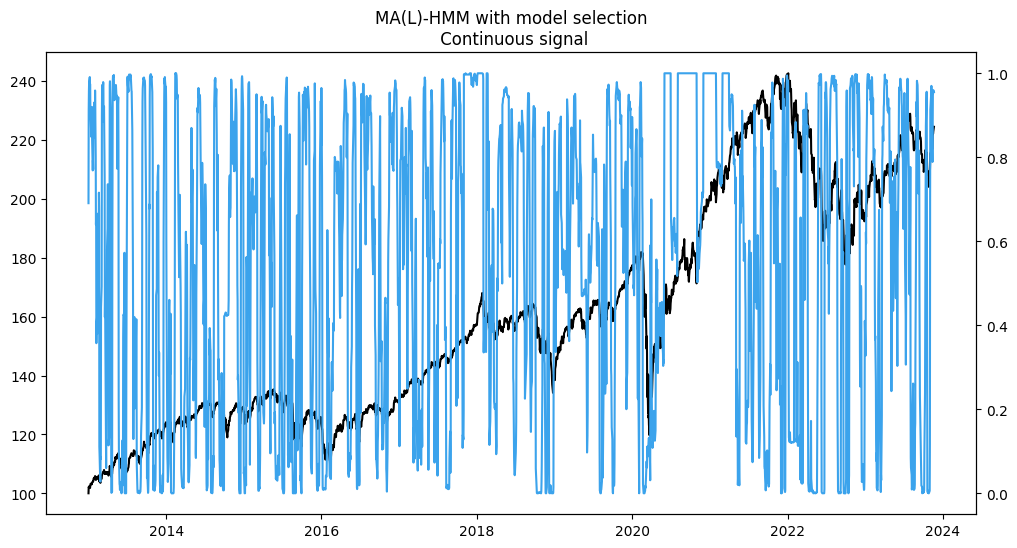

In [46]:
for i in range(1, len(xb_all)):
    xb, xc = xb_all[i], xc_all[i]

    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(dates, compute_price(y), color='black')
    trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax2 = ax.twinx()
    
    for j, color in enumerate(palette[2:3]):
        ax2.fill_between(dates, 0, 1, where=(xb)==j, facecolor=color, transform=trans, alpha=.4, label='Regime ' + str(j+1))
    ax2.set_yticks([])
    plt.title(signal_all[i] + '\n Binary signal')
    plt.show()

    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(dates, compute_price(y), color='black')
    ax2 = ax.twinx()
    plt.plot(dates, xc, color=palette[2])
    plt.title(signal_all[i] + '\n Continuous signal')
    plt.show()